In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [2]:
# !pip install -i https://pypi.org/simple/ xgboost

In [3]:
df = pd.read_csv("creditcard_2023.csv")
df.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.shape

(568630, 31)

In [3]:
import pandas as pd



# Separate data for each class
legit= df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Sample 50,000 data points for each class
sampled_class_0 = legit.sample(n=50000, random_state=42)
sampled_class_1 = fraud.sample(n=50000, random_state=42)

# Concatenate the sampled data to create the final subset
dataset = pd.concat([sampled_class_0, sampled_class_1], axis=0)

# Shuffle the subset data to randomize the order
dataset = dataset.sample(frac=1, random_state=42)

# Verify the shape of the subset
print(dataset.shape)


(100000, 31)


In [4]:
dataset.shape

(100000, 31)

In [5]:
dataset.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 529424 to 276549
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      100000 non-null  int64  
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21  

In [7]:
dataset.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dataset.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,284622.499720,-0.000112,-0.002536,-0.000027,0.001935,0.005369,-0.001925,-0.000844,0.003628,0.004143,...,0.001373,-0.001610,-0.001197,-0.000412,-0.004137,0.003650,0.004916,0.000873,11998.846162,0.500000
std,164154.510567,0.999421,0.999365,0.997009,0.995223,1.009724,1.000282,0.933906,0.999406,1.000814,...,0.992876,0.995819,1.012024,1.000857,1.000984,0.999363,0.983359,0.972834,6904.987211,0.500003
min,0.000000,-3.218534,-30.696313,-2.518308,-4.795050,-3.986931,-16.246810,-4.349696,-7.800072,-3.751900,...,-12.224367,-6.450353,-21.504910,-4.067968,-8.906746,-5.027855,-5.956088,-20.848764,50.250000,0.000000
25%,142378.750000,-0.567153,-0.486641,-0.647509,-0.653117,-0.293099,-0.448226,-0.281032,-0.190891,-0.568805,...,-0.166502,-0.492593,-0.236272,-0.653470,-0.552923,-0.628265,-0.303950,-0.229938,6039.660000,0.000000
50%,284278.500000,-0.094059,-0.135368,-0.000276,-0.072375,0.080474,0.078519,0.231776,-0.113464,0.095074,...,-0.036856,-0.028157,-0.057541,0.017184,-0.011170,-0.003636,-0.170471,-0.013260,11949.770000,0.500000
75%,426667.750000,0.829423,0.344271,0.627295,0.706575,0.443176,0.497217,0.525757,0.048568,0.562254,...,0.148267,0.462584,0.156242,0.704870,0.540575,0.677254,0.339282,0.413612,17962.147500,1.000000
max,568626.000000,2.189843,4.360274,4.440555,2.574357,33.546728,9.222311,26.333560,5.958040,12.139515,...,8.087080,9.770893,24.264557,11.035900,11.103060,5.623285,22.915024,36.678192,24039.500000,1.000000


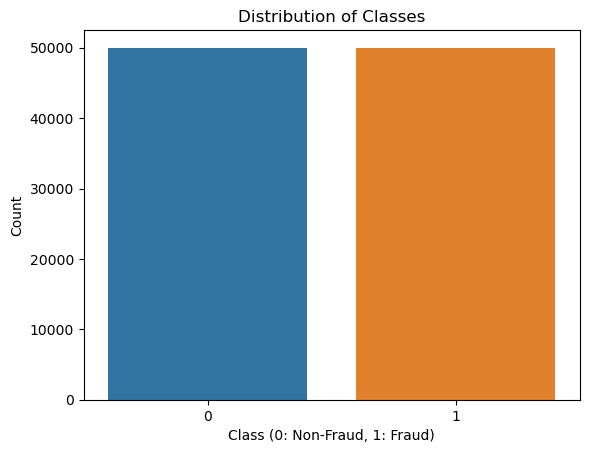

In [9]:
#class imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=dataset)
plt.title('Distribution of Classes')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


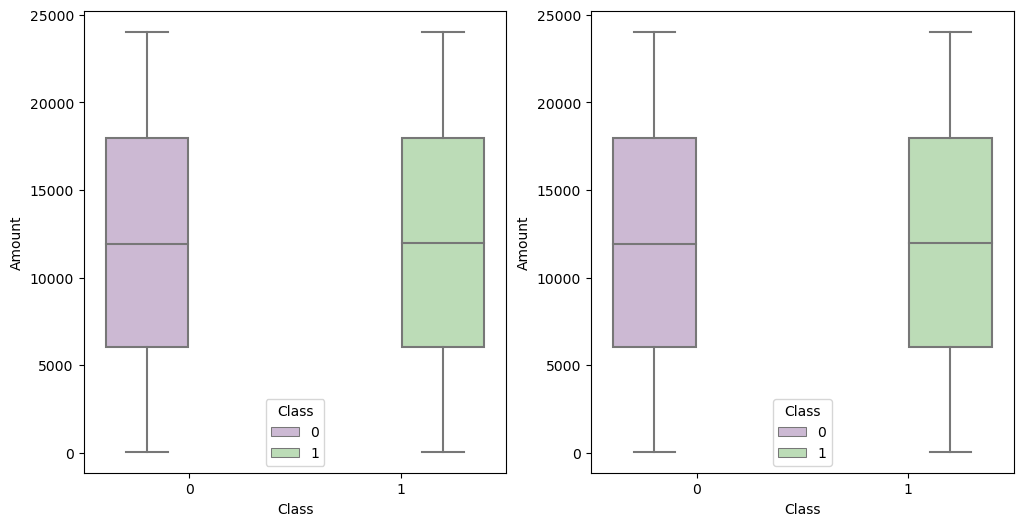

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=False)
plt.show()

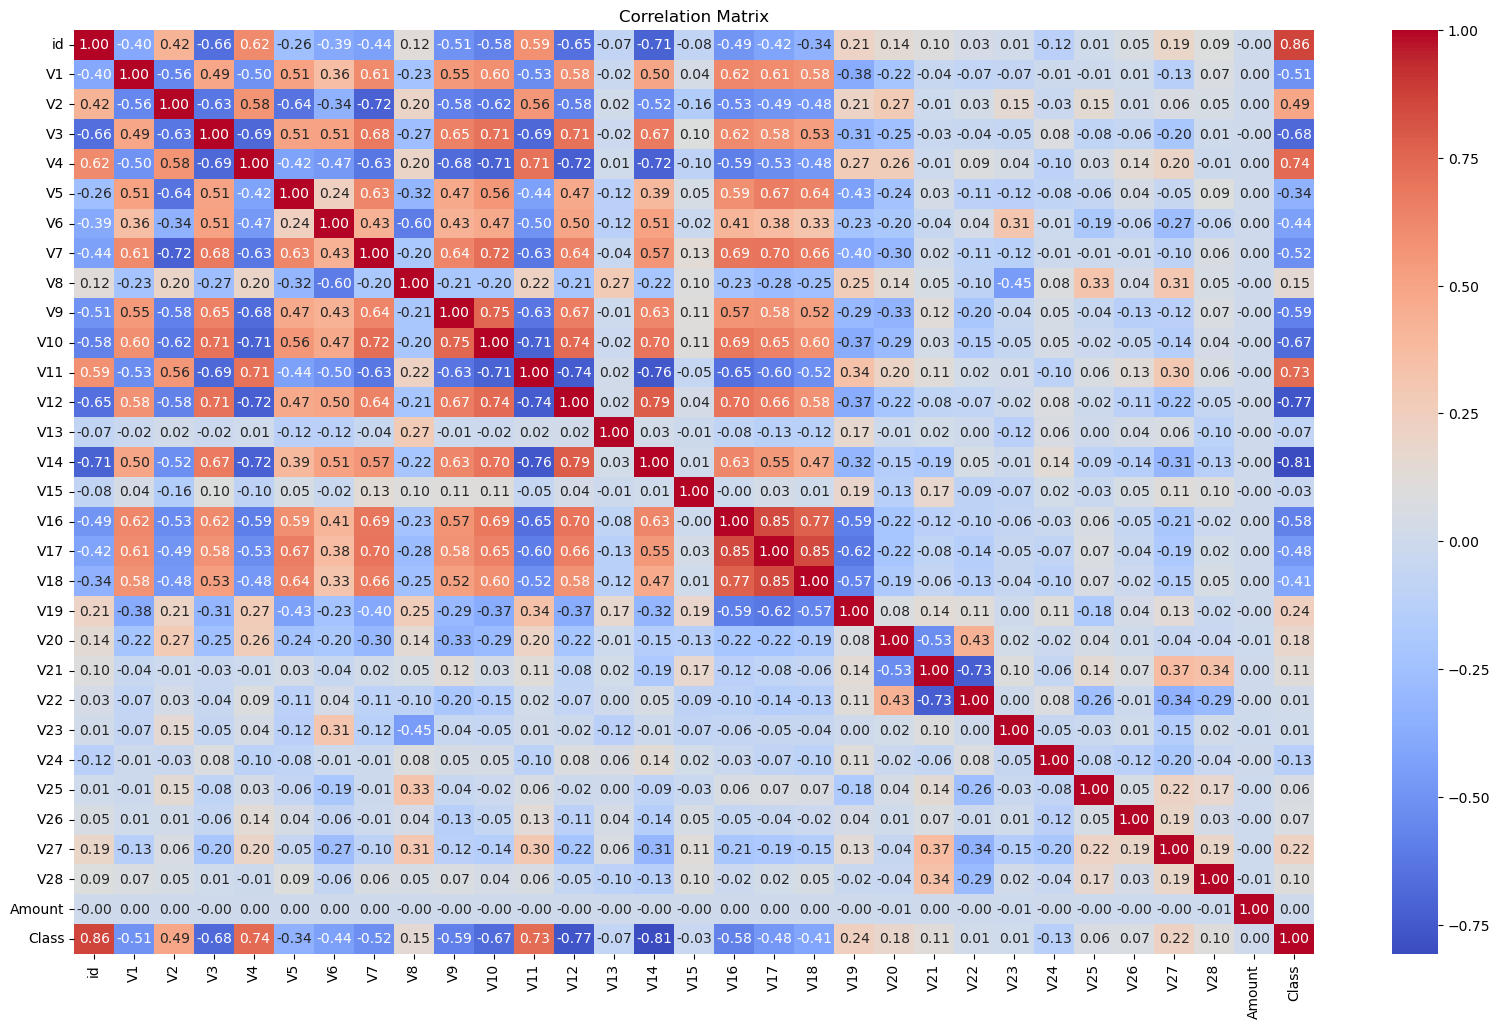

In [11]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


   Class
1  50000
0  50000


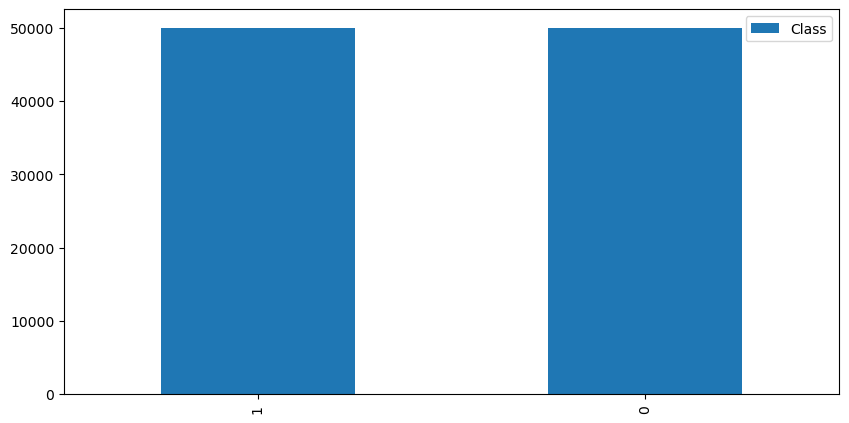

In [12]:
dataset_sym = pd.DataFrame(dataset['Class'].value_counts())
print(dataset_sym)
dataset_sym.plot(kind = 'bar',figsize = (10,5),legend = True)
plt.show()


In [13]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [15]:
dataset_sym = pd.DataFrame(dataset['Class'].value_counts())
print(dataset_sym)

   Class
1  50000
0  50000


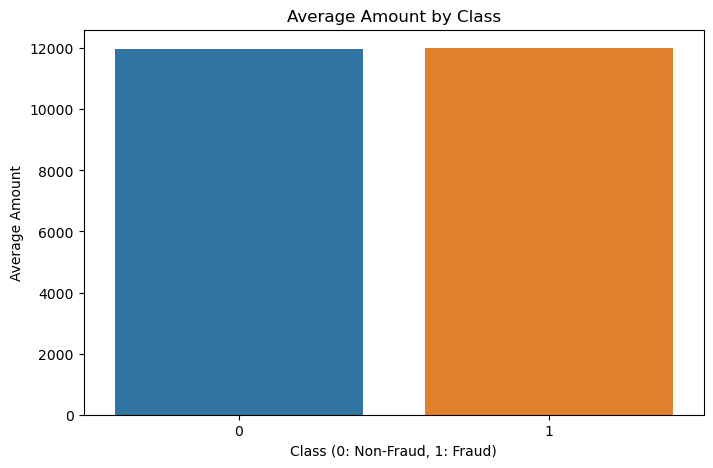

In [16]:
plt.figure(figsize=(8, 5))

# Bar plot
sns.barplot(x='Class', y='Amount', data=dataset, estimator='mean', errorbar=None)
plt.title('Average Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Average Amount')

plt.show()


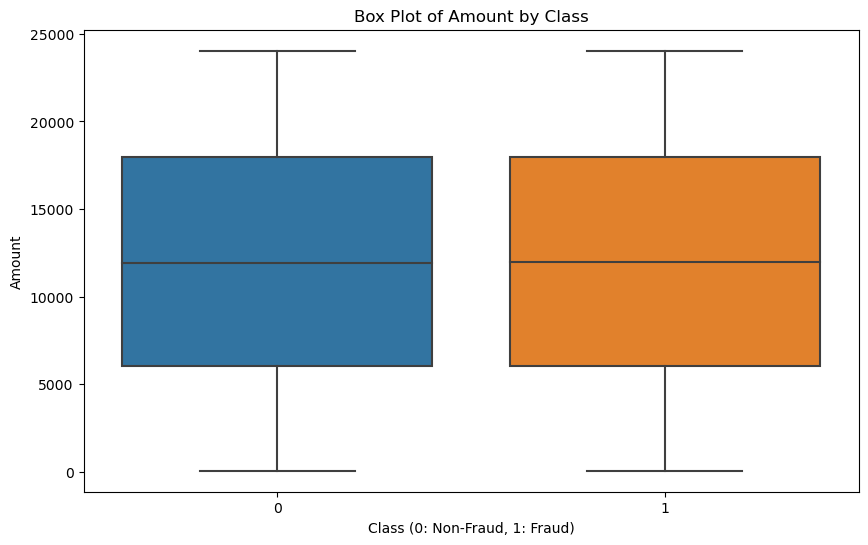

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Amount' is the column containing outliers
# You can adjust the column name based on your actual dataset
column_name = 'Amount'

# Visualize the boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y=column_name, data=dataset)
plt.title(f'Box Plot of {column_name} by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel(column_name)
plt.show()


In [18]:
dataset.shape

(100000, 31)

In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assume 'df' is your DataFrame
# fraud_data = dataset[dataset['Class'] == 1]
# non_fraud_data = dataset[dataset['Class'] == 0]

# plt.figure(figsize=(14, 10))

# for i in range(1, 29):
#     plt.subplot(7, 4, i)
#     sns.kdeplot(fraud_data[f'V{i}'], label='Fraud', shade=True)
#     sns.kdeplot(non_fraud_data[f'V{i}'], label='Non-Fraud', shade=True)
#     plt.title(f'Distribution of V{i}')

# plt.tight_layout()
# plt.show()




In [20]:
from sklearn.preprocessing import StandardScaler

dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
529424,529424,-0.819043,1.085489,-1.149642,1.651523,-0.943622,-1.724520,-1.196888,0.506881,-1.684193,...,0.653327,0.093500,-0.077904,0.851543,0.485963,0.323318,2.429973,2.101002,-0.138727,1
434415,434415,-0.113376,0.338494,-0.514143,0.831147,-0.294062,0.048543,-0.574933,0.178710,-0.815598,...,0.196135,-0.284421,-0.355971,-1.321984,1.196027,0.341433,1.241565,1.172904,-1.156252,1
254626,254626,-0.078860,-0.287465,1.654901,-0.827786,0.224548,0.327087,0.577556,-0.108098,0.539084,...,-0.130284,-0.184988,0.032983,0.105477,-0.524358,-1.345610,0.226224,0.399387,1.058562,0
516891,516891,-0.497789,0.407065,-0.596811,0.265953,-0.231272,0.228945,-0.102203,0.210084,-0.023193,...,0.202876,0.751832,-0.038512,0.709546,-0.232977,-1.001528,0.125444,0.177560,0.618835,1
310731,310731,0.234099,0.267460,-0.546588,0.585920,0.035365,-0.334644,-0.292280,0.021257,-0.342648,...,0.011746,-0.723328,-0.260316,-1.384580,1.416915,-0.498039,0.913392,1.019731,0.205446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244128,244128,1.643561,-0.531575,0.441470,-0.380290,-0.028032,-0.102397,0.332378,-0.198473,1.211809,...,-0.152250,-0.207429,0.377346,0.968066,-0.787938,-1.672360,-0.191032,-0.146381,-0.176502,0
558334,558334,0.888601,0.323796,-0.716467,1.073780,0.602463,-0.596573,0.035903,-0.063492,-0.745106,...,0.022632,-0.416487,-0.111710,0.080129,0.683228,0.423206,0.426807,0.633664,-0.412679,1
543450,543450,0.928281,0.422714,-0.621372,0.838082,1.815664,-0.363139,0.834401,-0.476788,-0.484507,...,0.325668,-0.639764,0.259464,-1.702483,-1.604966,0.077851,-0.077842,0.135085,-1.301969,1
88007,88007,-0.464132,-0.413635,1.346685,-0.519964,0.761561,1.011181,0.328170,-0.233920,0.668487,...,0.128321,-0.050081,-0.518144,-0.902604,-0.904975,0.605593,-0.243823,-1.700893,-1.321735,0


In [21]:
X = dataset.drop(columns='Class', axis=1)
Y = dataset['Class']

In [22]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
529424  529424 -0.819043  1.085489 -1.149642  1.651523 -0.943622 -1.724520   
434415  434415 -0.113376  0.338494 -0.514143  0.831147 -0.294062  0.048543   
254626  254626 -0.078860 -0.287465  1.654901 -0.827786  0.224548  0.327087   
516891  516891 -0.497789  0.407065 -0.596811  0.265953 -0.231272  0.228945   
310731  310731  0.234099  0.267460 -0.546588  0.585920  0.035365 -0.334644   
...        ...       ...       ...       ...       ...       ...       ...   
244128  244128  1.643561 -0.531575  0.441470 -0.380290 -0.028032 -0.102397   
558334  558334  0.888601  0.323796 -0.716467  1.073780  0.602463 -0.596573   
543450  543450  0.928281  0.422714 -0.621372  0.838082  1.815664 -0.363139   
88007    88007 -0.464132 -0.413635  1.346685 -0.519964  0.761561  1.011181   
276549  276549  1.704289 -0.485879  0.137380 -0.048805  0.336827  0.558627   

              V7        V8        V9  ...       V20       V21  

In [23]:
print(Y)

529424    1
434415    1
254626    0
516891    1
310731    1
         ..
244128    0
558334    1
543450    1
88007     0
276549    0
Name: Class, Length: 100000, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(100000, 30) (80000, 30) (20000, 30)


In [26]:
dataset.shape

(100000, 31)

# 1. Machine learning Algorithm

# Logistic Regression


In [27]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

Model Evaluation

In [29]:
prediction = model.predict(X_train)
training_acc = accuracy_score(prediction, Y_train)
print("Accuracy on training data", training_acc)

Accuracy on training data 0.998175


In [30]:
# accuracy on test data
preyd = model.predict(X_test)
testing_acc = accuracy_score(preyd, Y_test)
print(testing_acc)

0.99805


In [31]:
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=2)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(logreg_model, X, Y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


C:\Users\asmit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asmit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Scores: [0.9972 0.9968 0.9968 0.9969 0.9962 0.9953 0.9968 0.9953 0.9974 0.9963]
Mean Accuracy: 0.9964999999999999
Standard Deviation: 0.0006884765791223498


C:\Users\asmit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Select a random subset of 20 instances from the test set
random_indices = np.random.choice(X_test.shape[0], 50, replace=False)
X_random_subset = X_test[random_indices]
y_true_subset = Y_test.iloc[random_indices]

# Make predictions on the random subset
y_pred_subset = model.predict(X_random_subset)

# Print predictions and true labels
print("Predictions:")
print(y_pred_subset)
print("\nTrue Labels:")
print(y_true_subset.values)

Predictions:
[1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0]

True Labels:
[1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0]


In [33]:
#Classification report
len(model.predict(X_train))
print(classification_report(Y_test,model.predict(X_test)))
print(confusion_matrix(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9916
           1       1.00      1.00      1.00     10084

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[ 9904    12]
 [   27 10057]]


Text(0.5, 1.0, 'Accuracy Score: 0.99805')

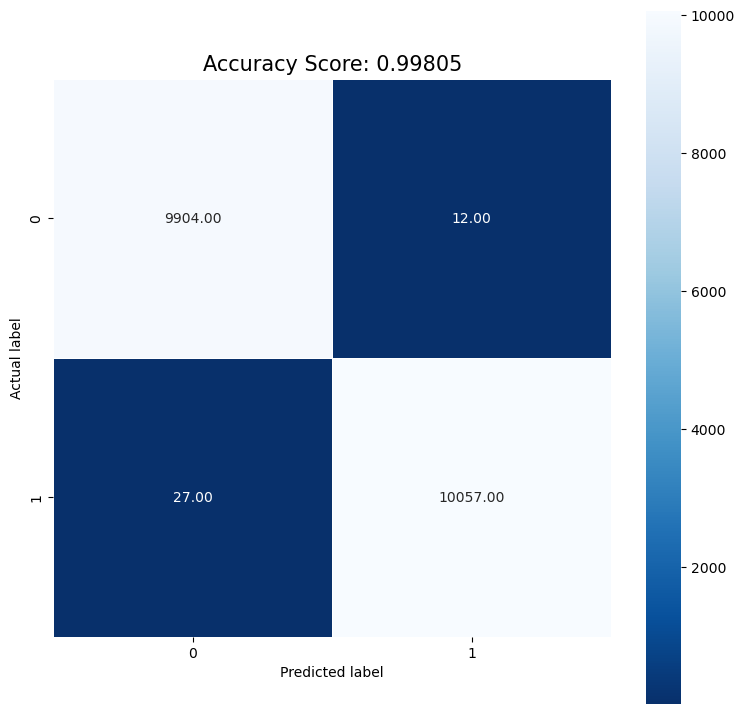

In [34]:
cm = confusion_matrix(Y_test,model.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.2f', linewidths=.7, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_test,model.predict(X_test)))
plt.title(all_sample_title,size=15)

In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# # Define hyperparameters and their possible distributions
# param_dist = {
#     'C': uniform(loc=0.001, scale=1000),
#     'penalty': ['l1', 'l2']
# }

# # Create logistic regression model
# logreg_model = LogisticRegression(random_state=2)

# # Perform randomized search with cross-validation
# randomized_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=10)
# randomized_search.fit(X_train, Y_train)

# # Get the best hyperparameters
# best_params = randomized_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for predictions
# best_model = randomized_search.best_estimator_
# y_pred = best_model.predict(X_test)


In [36]:
!pip install --upgrade scikit-learn


# KNN Neighbors

In [37]:
train_accuracy = []
test_accuracy = []
test_accuracy_dict = {}

for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_acc = knn.score(X_test, Y_test)
    test_accuracy.append(test_acc)
    test_accuracy_dict[i] = test_acc

# Find the K value with the highest accuracy
best_k = max(test_accuracy_dict, key=test_accuracy_dict.get)
best_accuracy = test_accuracy_dict[best_k]

print("Train Accuracy for different K values:")
print(train_accuracy)

print("\nTest Accuracy for different K values:")
print(test_accuracy)

print("\nTest Accuracy Dictionary:")
print(test_accuracy_dict)

print("\nBest K value:", best_k)
print("Best Accuracy:", best_accuracy)

Train Accuracy for different K values:
[1.0, 0.999975, 0.99915, 0.9993625, 0.9986375, 0.998925, 0.998425, 0.9985, 0.9982125, 0.9983625, 0.9980625, 0.998275, 0.9980875, 0.9982375, 0.997875, 0.99805, 0.997725, 0.99785, 0.99755, 0.9977875, 0.9975, 0.997625, 0.9974, 0.9974875, 0.9972375, 0.9973375, 0.997225, 0.997375, 0.997125]

Test Accuracy for different K values:
[0.99895, 0.99935, 0.9987, 0.99905, 0.99875, 0.999, 0.9983, 0.99845, 0.9981, 0.99845, 0.99785, 0.99825, 0.9979, 0.99835, 0.99795, 0.9982, 0.9979, 0.998, 0.99775, 0.9979, 0.99745, 0.99785, 0.99745, 0.9975, 0.9973, 0.99755, 0.99725, 0.9974, 0.9972]

Test Accuracy Dictionary:
{1: 0.99895, 2: 0.99935, 3: 0.9987, 4: 0.99905, 5: 0.99875, 6: 0.999, 7: 0.9983, 8: 0.99845, 9: 0.9981, 10: 0.99845, 11: 0.99785, 12: 0.99825, 13: 0.9979, 14: 0.99835, 15: 0.99795, 16: 0.9982, 17: 0.9979, 18: 0.998, 19: 0.99775, 20: 0.9979, 21: 0.99745, 22: 0.99785, 23: 0.99745, 24: 0.9975, 25: 0.9973, 26: 0.99755, 27: 0.99725, 28: 0.9974, 29: 0.9972}

Best K

In [38]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Perform 10-fold cross-validation
scores = cross_val_score(knn, X, Y, cv=10)

# Calculate the average accuracy from cross-validation
average_accuracy = scores.mean()

print("Average Accuracy:", average_accuracy)

# Fit the k-NN classifier on the training data
knn.fit(X_train, Y_train)

# Calculate the accuracy on the test set
test_accuracy = knn.score(X_test, Y_test)

print("Test Accuracy:", test_accuracy)

Average Accuracy: 0.99917
Test Accuracy: 0.99935


In [39]:

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=2)

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [40]:
X_pred = model.predict(X_train)
training_acc = accuracy_score(X_pred, Y_train)
print("Accuracy on training data", training_acc)

Accuracy on training data 0.998175


In [41]:
y_pred = model.predict(X_test)
training_acc = accuracy_score(y_pred, Y_test)
print("Accuracy on testing data", training_acc)

Accuracy on testing data 0.99805


In [42]:
# Select a random subset of 20 instances from the test set
random_indices = np.random.choice(X_test.shape[0], 20, replace=False)
X_random_subset = X_test[random_indices]
y_true_subset = Y_test.iloc[random_indices]

# Make predictions on the random subset
y_pred_subset = knn_model.predict(X_random_subset)

# Print predictions and true labels
print("Predictions:")
print(y_pred_subset)
print("\nTrue Labels:")
print(y_true_subset.values)

Predictions:
[1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0]

True Labels:
[1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0]


# Support Vector Machine

In [43]:
from sklearn.svm import SVC

# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)

# Fit the model to the training data
svm_model.fit(X_train, Y_train)


SVC(C=1, kernel='linear')

In [44]:
X_pred = svm_model.predict(X_train)
training_acc = accuracy_score(X_pred, Y_train)
print("Accuracy on training data", training_acc)

Accuracy on training data 0.998575


In [45]:
y_pred = svm_model.predict(X_test)
training_acc = accuracy_score(y_pred, Y_test)
print("Accuracy on testing data", training_acc)

Accuracy on testing data 0.9987


In [46]:
# Select a random subset of 20 instances from the test set
random_indices = np.random.choice(X_test.shape[0], 20, replace=False)
X_random_subset = X_test[random_indices]
y_true_subset = Y_test.iloc[random_indices]

# Make predictions on the random subset
y_pred_subset = svm_model.predict(X_random_subset)

# Print predictions and true labels
print("Predictions:")
print(y_pred_subset)
print("\nTrue Labels:")
print(y_true_subset.values)

Predictions:
[0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0]

True Labels:
[0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0]


# 2.Ensemble learning 

In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(Y_test,y_pred))

Decision Tree accuracy 0.99945


# XG boost

In [53]:
features = dataset.drop('Class', axis=1)
labels = dataset['Class']

# Split the data into training, validation, and test sets
TEST_SIZE = 0.2
VALID_SIZE = 0.2
RANDOM_STATE = 42

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True
)

features_train, features_valid, labels_train, labels_valid = train_test_split(
    features_train, labels_train, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True
)


In [59]:
# Prepare the train, valid, and test datasets for XGBoost
dtrain = xgb.DMatrix(features_train, labels_train)
dvalid = xgb.DMatrix(features_valid, labels_valid)
dtest = xgb.DMatrix(features_test, labels_test)

In [107]:

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.01
params['silent'] = True
params['max_depth'] = 9
params['subsample'] = 0.9
params['colsample_bytree'] = 0.8
params['eval_metric'] = 'auc'
params['n_estimators'] = 200
params['random_state'] = RANDOM_STATE

In [111]:
xg_model = xgb.train(params, 
                dtrain, 
                100, 
                watchlist, 
                early_stopping_rounds=100model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)0, 
                maximize=True, 
                verbose_eval=50)

[0]	train-auc:0.99962	valid-auc:0.99956


C:\Users\asmit\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:17:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-auc:1.00000	valid-auc:0.99998
[99]	train-auc:1.00000	valid-auc:0.99999


 The best validation score (ROC-AUC) was **1.000**, for round **99**.

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200]
}

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', seed=RANDOM_STATE)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

In [61]:
# Fit the model using grid search
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc', verbose=1)

In [62]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [63]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 200,
 'subsample': 0.9}

In [64]:
# Train the XGBoost model with the best hyperparameters
best_model = xgb.train(best_params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dvalid, 'valid')],
                       early_stopping_rounds=10)

[0]	train-rmse:0.49500	valid-rmse:0.49501
[1]	train-rmse:0.49006	valid-rmse:0.49007
[2]	train-rmse:0.48517	valid-rmse:0.48518
[3]	train-rmse:0.48059	valid-rmse:0.48063
[4]	train-rmse:0.47579	valid-rmse:0.47584


C:\Users\asmit\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-rmse:0.47104	valid-rmse:0.47109
[6]	train-rmse:0.46633	valid-rmse:0.46638
[7]	train-rmse:0.46194	valid-rmse:0.46203
[8]	train-rmse:0.45732	valid-rmse:0.45742
[9]	train-rmse:0.45276	valid-rmse:0.45286
[10]	train-rmse:0.44823	valid-rmse:0.44834
[11]	train-rmse:0.44376	valid-rmse:0.44386
[12]	train-rmse:0.43932	valid-rmse:0.43943
[13]	train-rmse:0.43494	valid-rmse:0.43505
[14]	train-rmse:0.43059	valid-rmse:0.43071
[15]	train-rmse:0.42630	valid-rmse:0.42641
[16]	train-rmse:0.42204	valid-rmse:0.42216
[17]	train-rmse:0.41782	valid-rmse:0.41795
[18]	train-rmse:0.41365	valid-rmse:0.41378
[19]	train-rmse:0.40952	valid-rmse:0.40965
[20]	train-rmse:0.40573	valid-rmse:0.40587
[21]	train-rmse:0.40168	valid-rmse:0.40183
[22]	train-rmse:0.39766	valid-rmse:0.39782
[23]	train-rmse:0.39369	valid-rmse:0.39385
[24]	train-rmse:0.38976	valid-rmse:0.38993
[25]	train-rmse:0.38587	valid-rmse:0.38604
[26]	train-rmse:0.38224	valid-rmse:0.38244
[27]	train-rmse:0.37842	valid-rmse:0.37862
[28]	train-rmse:

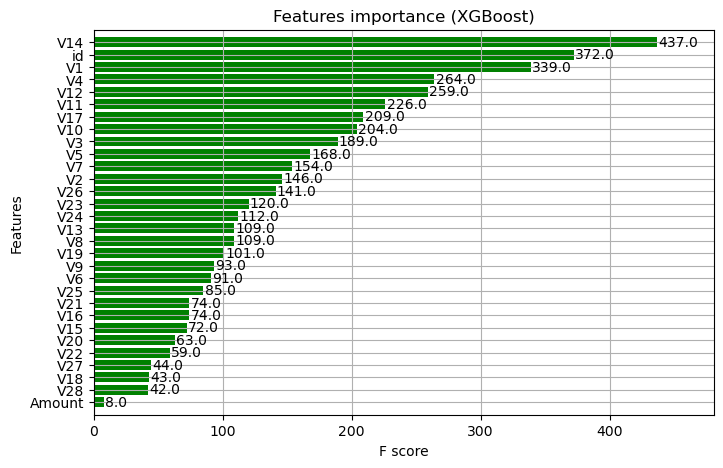

In [79]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(best_model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [66]:

# Make predictions on the test set
predictions = best_model.predict(dtest)
predictions


array([0.19080387, 0.81662387, 0.81662387, ..., 0.8159056 , 0.18965249,
       0.81662387], dtype=float32)

In [69]:
#Convert probabilities to binary predictions (0 or 1)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
binary_predictions

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,


In [70]:
# Evaluate the model
accuracy = accuracy_score(labels_test, binary_predictions)
roc_auc = roc_auc_score(labels_test, predictions)
conf_matrix = confusion_matrix(labels_test, binary_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.9997
ROC AUC: 1.0000
Confusion Matrix:
[[ 9920     2]
 [    4 10074]]


In [114]:
# Evaluate the model
accuracy = accuracy_score(labels_test, binary_predictions)
roc_auc = roc_auc_score(labels_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9997
ROC AUC: 1.0000


The AUC score for the prediction of fresh data (test set) is 0.974.

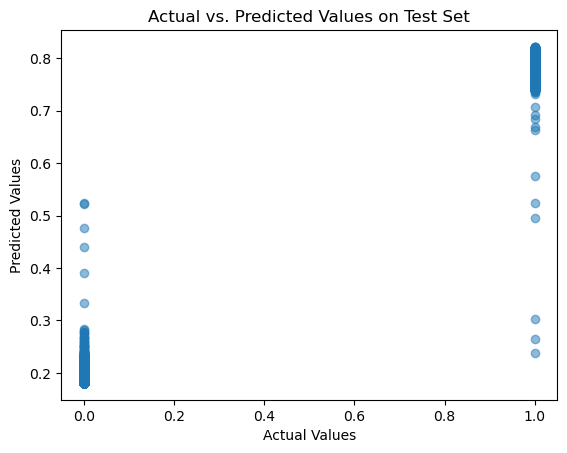

In [71]:
# Plotting actual vs. predicted values
plt.scatter(labels_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on Test Set")
plt.show()

        Actual  Predicted
153668       0          0
447846       1          1
335040       1          1
29426        0          0
459547       1          1
...        ...        ...
562180       1          1
118257       0          0
508322       1          1
45869        0          0
490962       1          1

[20000 rows x 2 columns]


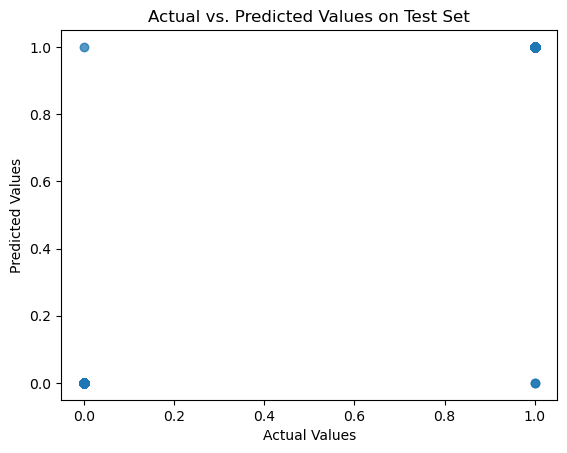

In [78]:
# Create a DataFrame
comparison_df = pd.DataFrame({'Actual': labels_test, 'Predicted': [1 if p > 0.5 else 0 for p in predictions]})

# Display the DataFrame
print(comparison_df)

# Plotting actual vs. predicted values
plt.scatter(labels_test, binary_predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on Test Set")
plt.show()

# RandomForest for Bagging

In [86]:
rf_model = RandomForestClassifier(n_jobs=4, 
                             random_state=41,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [88]:
# Train the model
rf_model.fit(features_train, labels_train)

RandomForestClassifier(n_jobs=4, random_state=41, verbose=False)

In [115]:
# Make predictions on the test set
rf_predictions = rf_model.predict(features_test)
rf_predictions

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [105]:
# Make predictions on the test set
labels_pred = rf_model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, labels_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 1.0000


# Conclusions


First I create a balanced subset by sampling **50,000** data points for each class (legitimate and fraud) and then concatenating them to form the final dataset with shape **(100000,31)**.
Then I investigated the data , checking for data unbalancing , visualizing.Then I did the some prediction using some **ML** algorithm(logistic Regression, KNN Neighbors and SVM). And then did prediction with ensembling learning like for **Boosting :XGBOOSt** and **Bagging: Randomforest**
        
I started with **Logistic regression**, for which we get the **0.998** accuracy for training data and ***0.998** for testing data.
Followed with **KNN Neighbors** with overall best accuracy **0.99935**.Accuracy on (training data=0.9981) and (testing data= 0.9980).

Again with SVM(Support vector Machine).Accuracy on training data **0.998575**. Accuracy on testing data 0.9987

**For Ensemble Learning**:
We experimented with a **XGBoost** model. In this case, se used the validation set for validation of the training model. The best validation score obtained was **1.000**. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was **1.000**.

We then experimented with RandomForest where we get the accuracy **1.000** as well 

Overall both Ml algorithm and Ensemble learning did a great job for predicting model. Where the XG Boost and randomForest gave the perfect **1.000** as accuracy